In [1]:
import pandas as pd

In [2]:
%config Completer.use_jedi=False

In [3]:
data=pd.read_csv("/home/deepakdayal/Desktop/DEEPAK/Car-Price-Prediction-master/new/car data.csv")

In [4]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
data.shape

(301, 9)

In [6]:
print(data['Seller_Type'].unique())

['Dealer' 'Individual']


In [7]:
print(data['Transmission'].unique())
print(data['Owner'].unique())

['Manual' 'Automatic']
[0 1 3]


In [8]:
#Check Missing Values

data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
df=data[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [12]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
df['Current_yr']=2021

In [14]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_yr
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [15]:
df['No_of_year']=df['Current_yr']-df['Year']

In [16]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_yr,No_of_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [17]:
df.drop(labels=['Year','Current_yr'],inplace=True,axis=1)

In [18]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [19]:
df=pd.get_dummies(df,drop_first=True)

In [20]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [21]:
import seaborn as sns

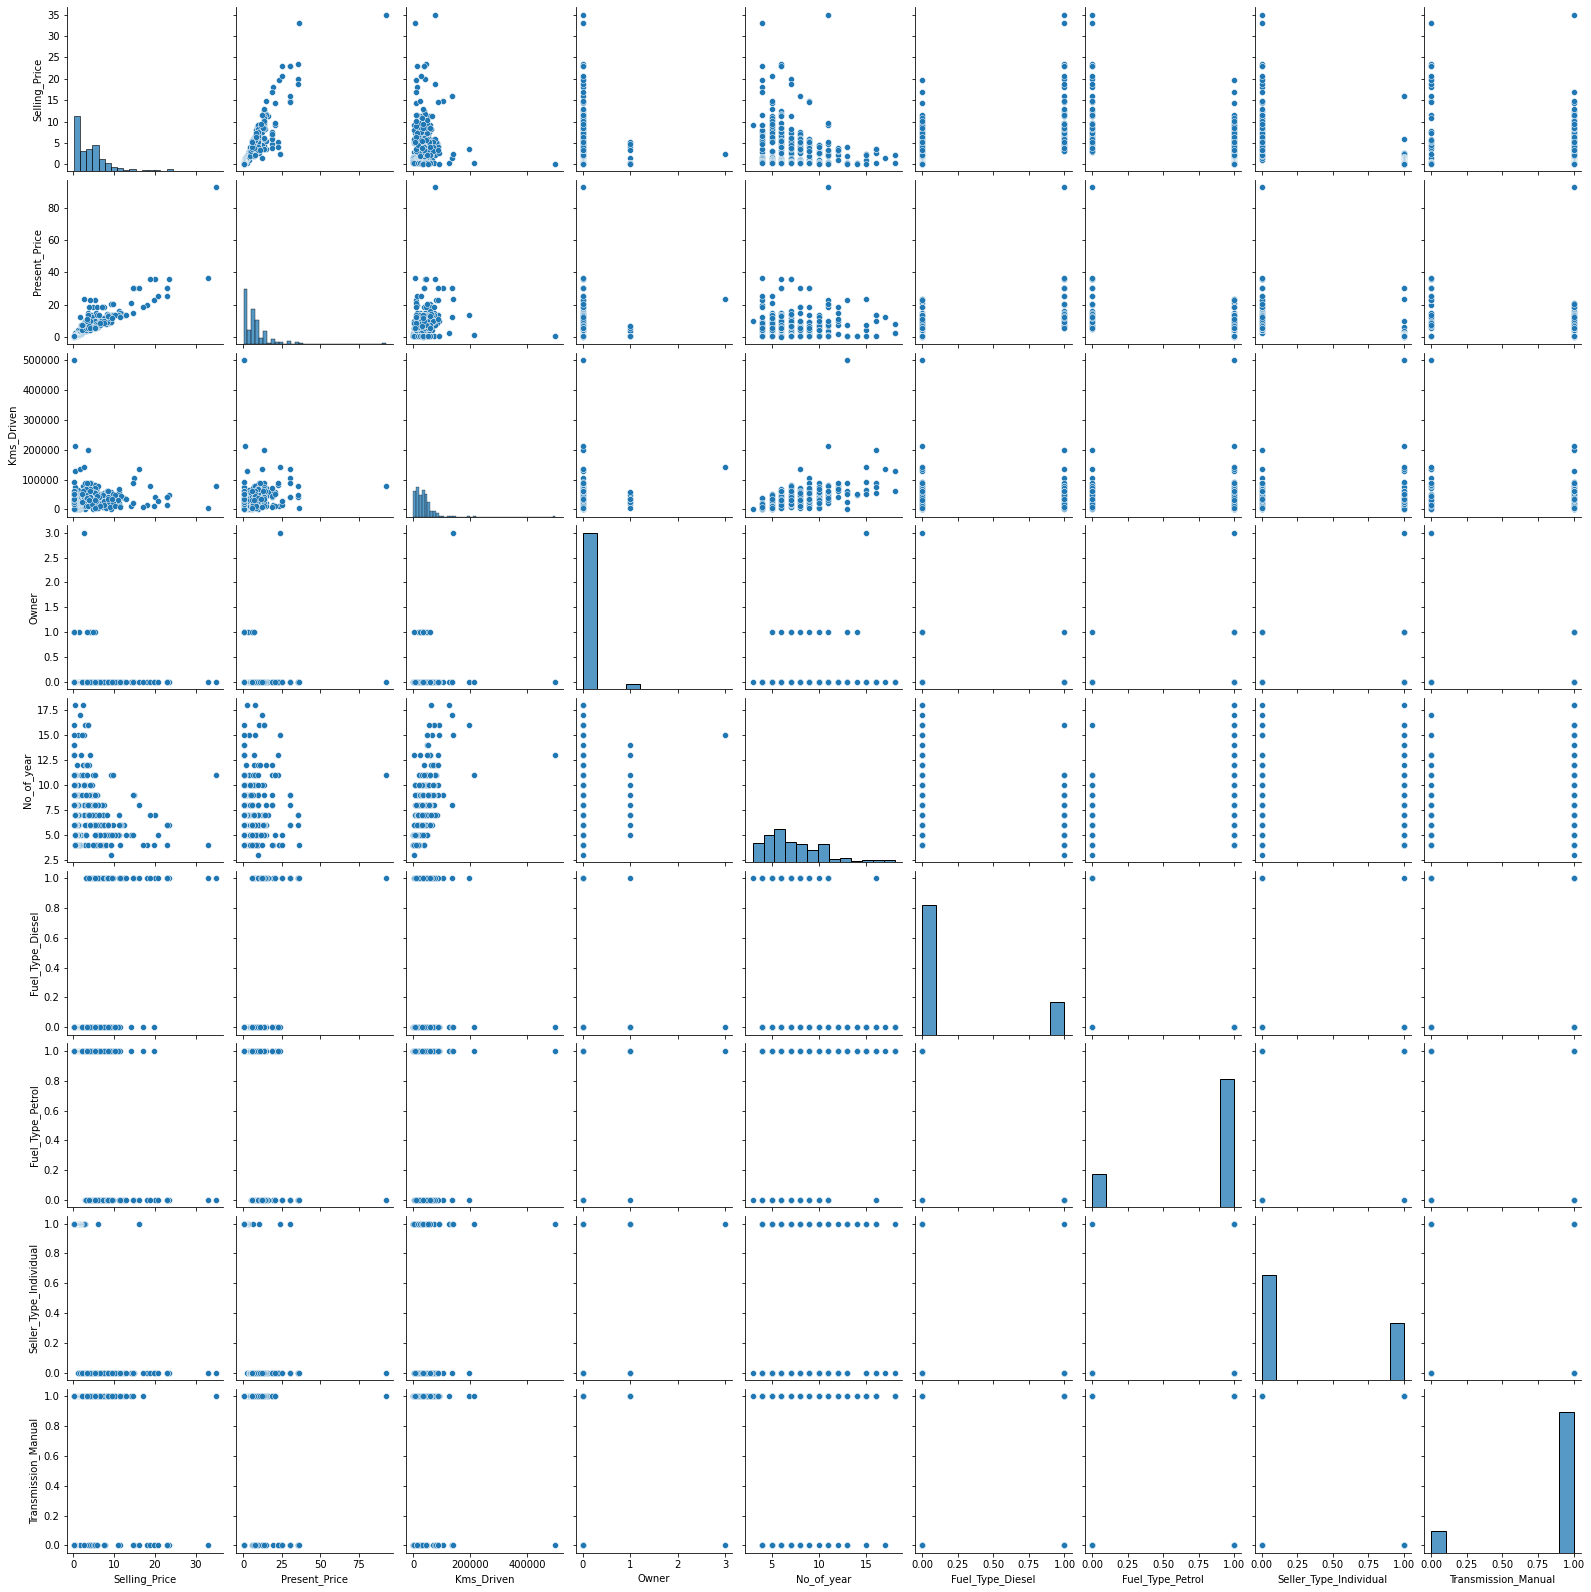

In [22]:
sns.pairplot(df)

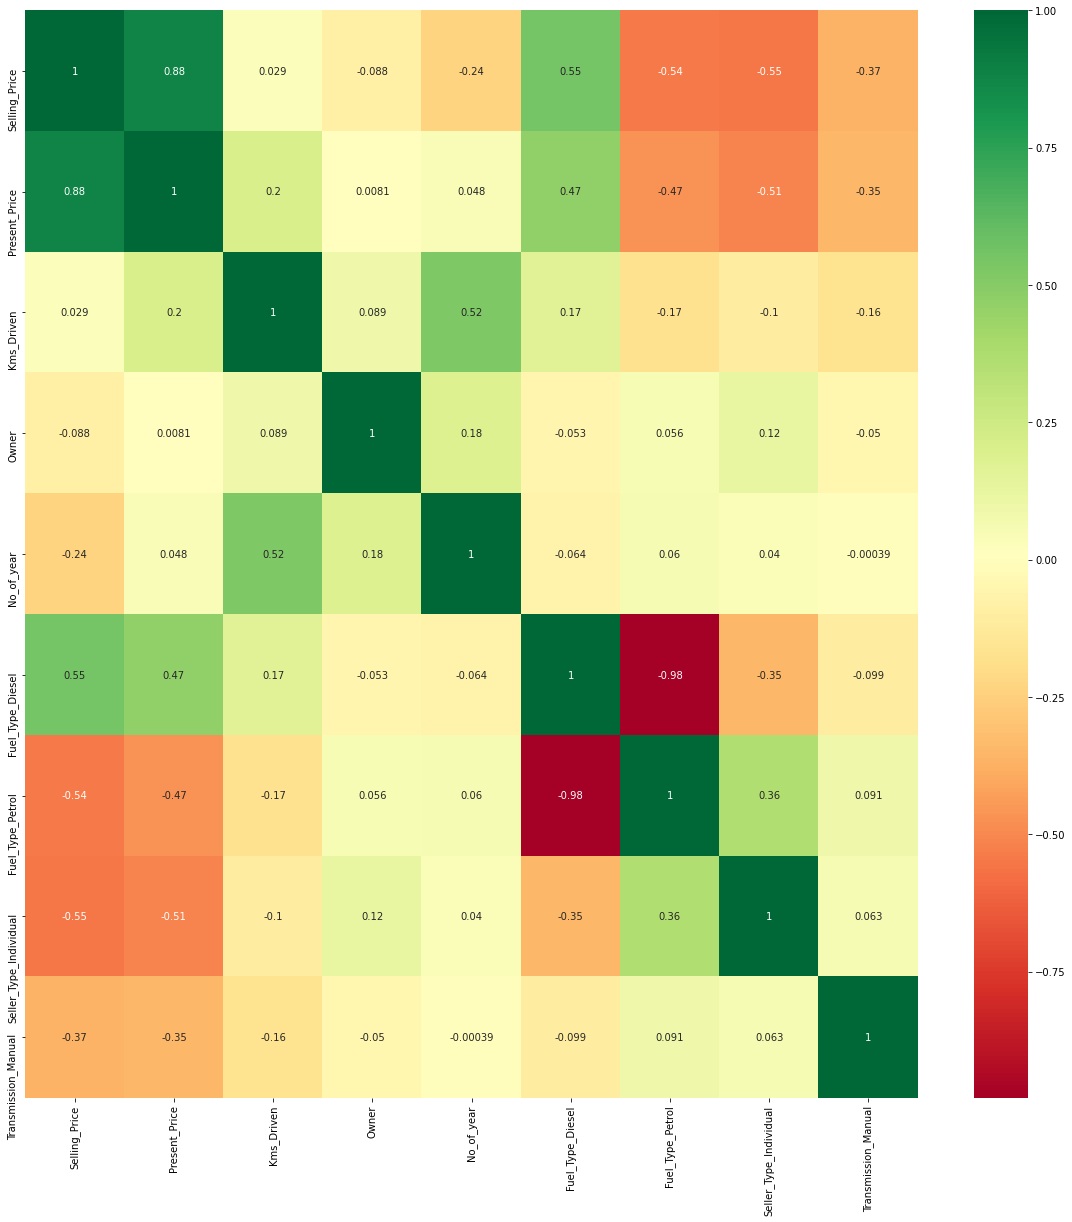

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,20))

cor=df.corr()
top_corr=cor.index

g=sns.heatmap(df[top_corr].corr(),annot=True,cmap='RdYlGn')


In [24]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [25]:
X=df.iloc[:,1:]

In [26]:
X.head()

,Present_Price,Kms_Driven,Owner,No_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [27]:
y=df.iloc[:,0]

In [28]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
#Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [31]:
model.feature_importances_

array([0.42938687, 0.041775  , 0.00084081, 0.07676272, 0.21171279,
       0.00893247, 0.11499074, 0.1155986 ])

In [32]:
feature_imp=pd.Series(model.feature_importances_,index=X.columns)

<AxesSubplot:>

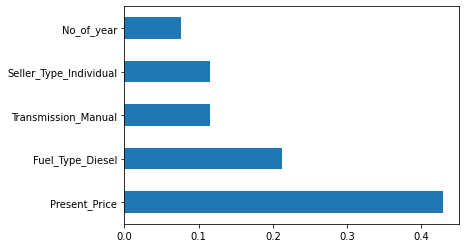

In [33]:
feature_imp.nlargest(5).plot(kind='barh')

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [35]:
X_train.shape

(240, 8)

In [48]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
import numpy as np

In [40]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

In [42]:
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [43]:
from sklearn.model_selection import RandomizedSearchCV


In [46]:
random_grid={'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf
}

In [47]:
print(random_grid)

{'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [49]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=12)

In [50]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=12,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [51]:
rf_random.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [52]:
predictions=rf_random.predict(X_test)

In [53]:
predictions

array([ 1.19543298,  7.3256644 ,  4.4742934 ,  7.30887504,  5.4883273 ,
        7.07853671,  0.94393968,  3.95070492,  0.4929881 ,  2.38087637,
        4.31303944,  4.07305723,  0.35438849,  3.53028357,  5.46076302,
        1.16633083,  0.33496024,  5.13639829,  2.65309682,  3.06727341,
        7.34516151,  1.55653056,  3.53532619,  0.19086635,  9.64648202,
        2.73565177, 21.35940905,  1.11482802,  0.90542655,  2.72336239,
        0.4841525 ,  0.35479722,  7.29275714,  5.98060036,  3.4087837 ,
        4.00649444,  5.08325377,  7.20377111,  0.44855659,  4.95282165,
        1.75737305,  4.43321865,  0.22502393,  7.0009652 , 15.49795246,
        5.35677256,  4.32531966,  0.64459958,  6.64186671,  3.37520833,
        5.2760223 , 18.81173933,  9.7511619 ,  3.2716869 ,  3.97343988,
        0.46499643,  0.74608565,  2.61514683,  8.46749508,  4.36689361,
        6.73255321])

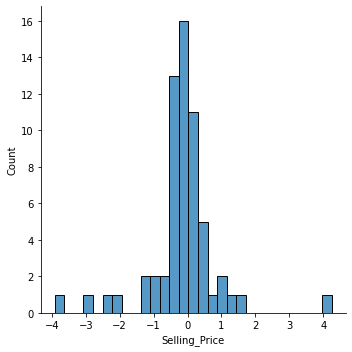

In [54]:
sns.displot(y_test-predictions)

/home/deepakdayal/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Selling_Price'>

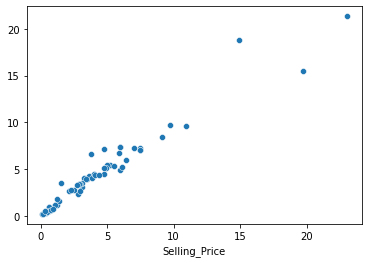

In [56]:
sns.scatterplot(y_test,predictions)

In [57]:
import pickle
file=open("car_fare_prediction.pkl","wb")

In [58]:
pickle.dump(rf_random,file)